

<h1> <b> <centre> DA5401 Assignment 2 </b> </centre> </h2>
<h4> <b> <centre> Name: Pawar Devesh Pramod </centre></b> </h4>
<h4> <b> <centre> Roll No: ME22B176  </centre></b> </h4>
<h4> <b> <centre> Date of Submission 05/09/2025 </centre></b> </h4>


<h3> <b> Objective: </b> <h3> 
<p style="font-size: 18px;">This assignment will challenge you to apply concepts of vector spaces,
dimensionality reduction, and feature engineering to a real-world classification problem. You will
use Principal Component Analysis (PCA) to reduce the data's dimensionality and then evaluate
how this reduction affects the performance of a Logistic Regression classifier. </p>

<p style="font-size: 18px;"> Dataset: <a href="https://www.kaggle.com/datasets/uciml/mushroom-classification"> Mushroom Dataset </a> </p>

### Part A: Exploratory Data Analysis (EDA) & Preprocessing


1. Load & Prepare the Dataset

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "mushrooms.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/mushroom-classification",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_6816/1605462206.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [51]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### <b> Why One Hot Encoding ?</b> 

- PCA requires numerical input because it is based on computing variances and covariances. Since the Mushroom dataset consists entirely of categorical features, performing one-hot encoding converts these categories into binary numerical vectors. Without this step, PCA would not be able to process the categorical variables, and the relationships between categories could not be represented in a- vector space.
- One hot encoding preserves information, each category is represented explicitly without imposing arbitrary ordering.
- One hot encoding allows PCA to correctly measure variance across categories, since each category becomes a distinct dimension.

In [4]:
# Import one hot encoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

categorical_columns = [col for col in df.columns if df[col].dtype in ['object', 'category']]
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

In [5]:
df_sklearn_encoded.head(10)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
""" Seperate out the features and target variable """
X = df_sklearn_encoded.drop(['class_e', 'class_p'], axis=1)  # Features
y = df_sklearn_encoded[['class_e', 'class_p']]               # Target variable

2. Initial Analysis

In [7]:
print("Original dataframe shape: ", df.shape)
print("Encoded dataframe shape: ", df_sklearn_encoded.shape)

Original dataframe shape:  (8124, 23)
Encoded dataframe shape:  (8124, 119)


- Initially the dataset had 23 columns.
- Now the encoded dataset has 119 columns.

We can conclude that there are different 119 categorical data points across all the feature columns.

3. Standardization

### <b> Why standardization of one hot encoded dataset is good practice? </b>

- Even though one-hot encoded features are binary (0 or 1), standardizing before PCA is important because PCA is variance-based. Features with higher variance (e.g., categories that occur frequently) can dominate the principal components, while rare categories contribute very little. Standardization ensures that all features are placed on the same scale with mean 0 and variance 1, so that PCA treats all categories fairly and does not bias toward those with higher occurrence frequencies.

In [8]:
""" Apply Standardization """
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head(10)

y_scaled = y.values
y_scaled[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Part B: Principal Component Analysis (PCA)

1. Apply PCA

In [9]:
""" Apply the PCA """
from sklearn.decomposition import PCA
pca = PCA()  # Without specifying n_components to get all components
X_pca = pca.fit_transform(X_scaled_df)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117
0,3.284737,1.020105,-1.353591,-1.361726,-0.478375,-0.486227,-2.988416,-1.085874,4.908155,4.233882,...,3.224221e-15,-1.903846e-15,2.338482e-14,-1.736278e-14,9.958316e-15,1.226644e-14,-3.965448e-15,-2.037634e-14,3.327209e-14,-1.174219e-14
1,3.969481,-0.856895,0.237503,-1.903058,1.281135,-2.193247,-4.367826,-0.494000,-0.960146,-1.858999,...,-2.091012e-14,6.068943e-15,-1.067994e-14,-1.323761e-14,1.189774e-14,7.818609e-15,-8.794918e-15,-7.803060e-15,-6.224096e-15,-8.675203e-15
2,4.958586,-0.211112,0.466430,-1.557341,1.971429,-3.363282,-5.567695,-0.925606,-2.946658,-1.862181,...,2.734642e-14,-3.440811e-15,7.643940e-15,2.255321e-14,-1.385250e-14,-2.048514e-14,-7.629184e-15,-5.860170e-15,1.176234e-15,1.654074e-14
3,3.469967,0.337933,-1.334981,-0.881358,-0.008583,-0.638624,-3.126145,-0.874086,4.493688,4.287290,...,3.386638e-14,-6.788827e-15,3.376541e-14,7.228659e-15,-1.368943e-14,-1.282460e-14,-1.168150e-14,-2.714870e-14,2.527848e-14,8.630398e-15
4,2.726570,0.889648,-2.051852,-4.117670,-2.710545,2.501482,1.354385,0.029147,-0.451190,-1.160304,...,-1.191731e-14,-6.656988e-15,-1.084648e-14,6.080272e-15,-7.774028e-15,-1.555837e-15,9.301717e-15,-6.665081e-15,-1.091479e-14,-1.571124e-14
5,3.812989,-1.267767,0.353288,-0.865661,1.721261,-2.135794,-4.219419,-0.064515,-0.860122,-2.232315,...,-2.301954e-14,5.846898e-15,-1.228977e-14,-1.168330e-14,1.146752e-14,1.387626e-14,-1.195905e-14,-1.199415e-14,-9.832321e-15,-1.623860e-14
6,4.518180,-0.623080,0.571540,-1.897123,2.189959,-3.759886,-5.594440,-1.067531,-3.531083,-1.511509,...,3.489593e-14,-1.909496e-14,1.025296e-14,2.421854e-14,-2.116609e-14,-2.276110e-14,-2.411136e-15,-6.942637e-15,4.593639e-15,1.426478e-14
7,4.805180,-0.570956,0.310366,-1.130596,1.966954,-2.770101,-5.313274,-0.514700,-1.348041,-1.751957,...,1.074858e-14,3.636861e-15,5.590027e-15,1.411551e-14,-7.607494e-15,-5.691418e-15,-7.185095e-15,1.439547e-15,-1.024865e-14,1.395947e-14
8,2.550363,0.162168,-1.286618,-0.772069,-0.023326,-0.564925,-2.452537,-0.688895,2.891146,3.244268,...,7.136890e-15,-1.079257e-14,-2.404425e-14,2.013847e-14,-1.311004e-14,-8.689020e-15,4.611025e-15,5.158794e-15,-2.323826e-14,7.547930e-15
9,4.043775,-1.030415,0.762761,-1.641961,1.951508,-3.366376,-5.416677,-0.620975,-1.885584,-1.651148,...,-3.573293e-15,4.172139e-16,1.981802e-15,-2.482323e-15,-4.040903e-15,2.704644e-15,2.529357e-15,-2.890323e-15,-1.077601e-14,1.663748e-15


2. Scree Plot & Optimal Components

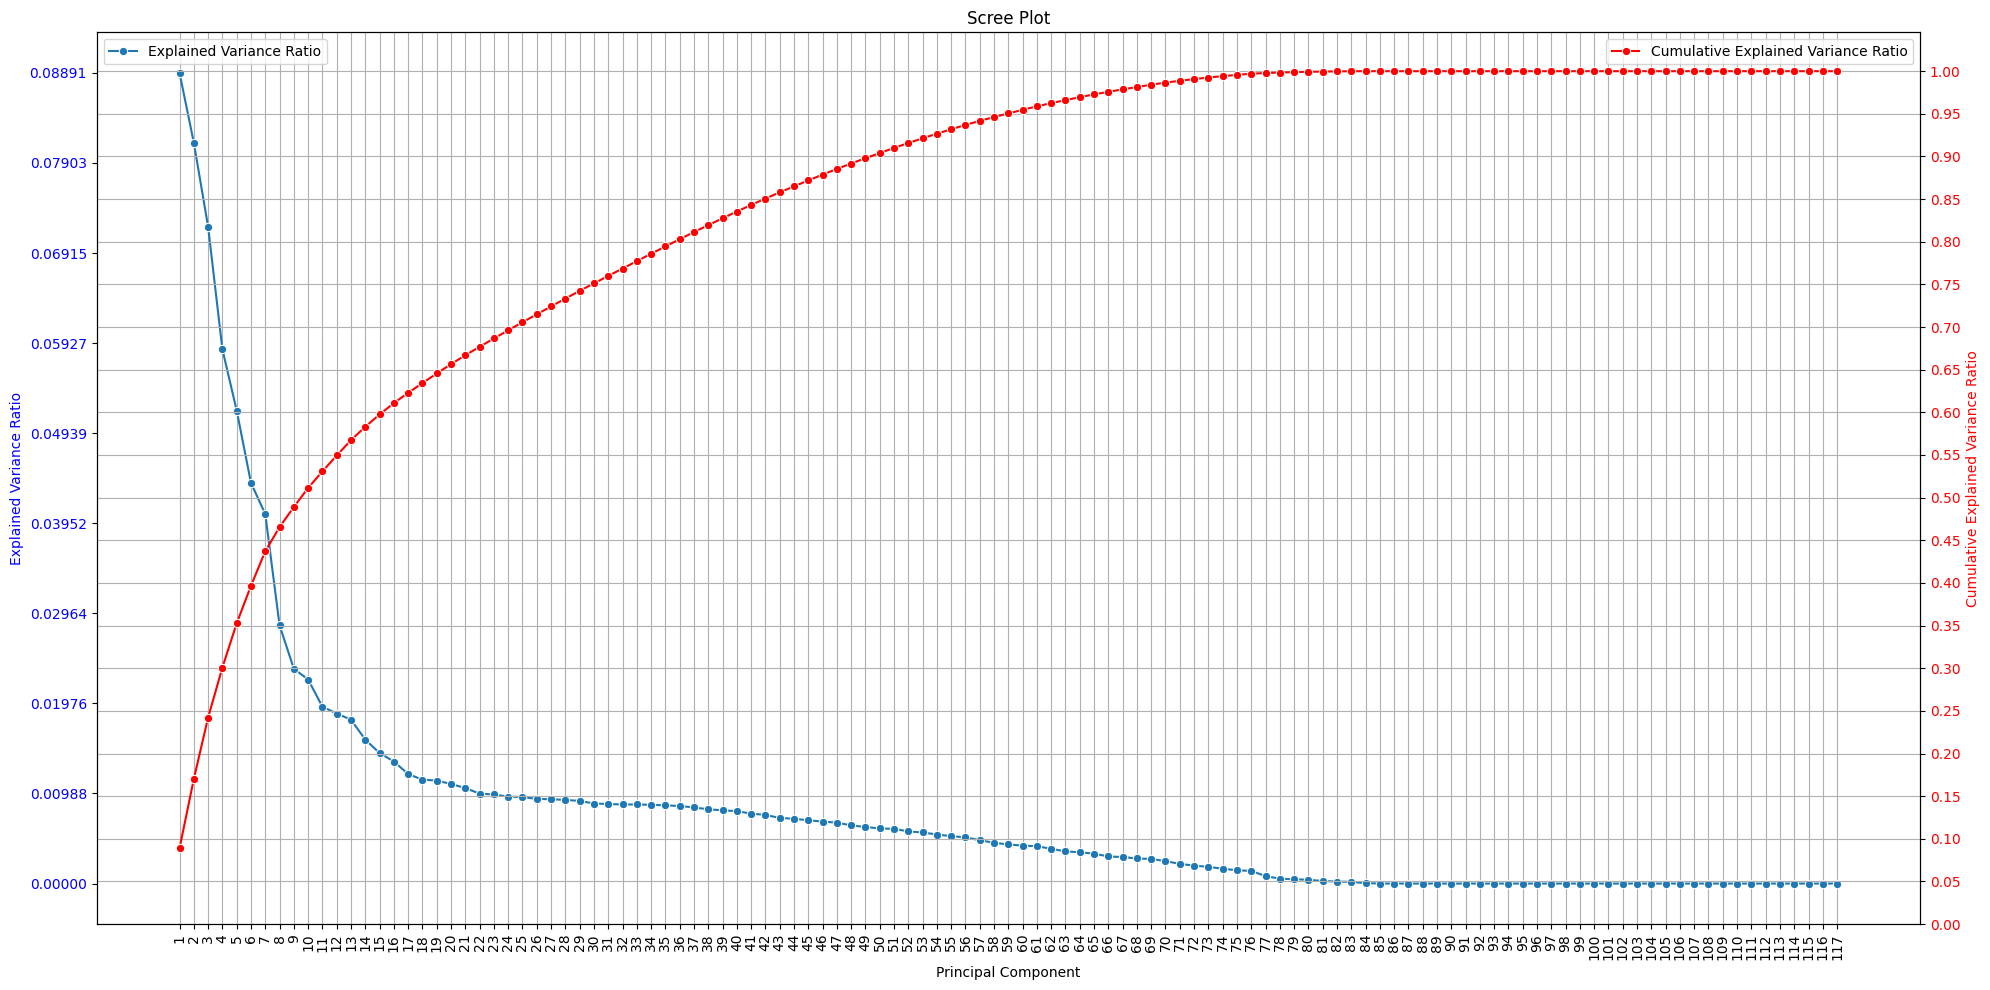

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


exception_variance = pca.explained_variance_ratio_

# Creating the DataFrame with correct Principal Component labeling
scree_data = pd.DataFrame({
    'Principal Component': range(1, len(exception_variance) + 1),
    'Explained Variance Ratio': exception_variance
})

fig, ax1 = plt.subplots(figsize=(20, 10))

# Plotting the explained variance ratio
sns.lineplot(x='Principal Component', y='Explained Variance Ratio', ax=ax1, data=scree_data, marker='o')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Cumulative explained variance
ax2 = ax1.twinx()
sns.lineplot(x='Principal Component', y=np.cumsum(exception_variance), ax=ax2, data=scree_data, marker='o', color='red')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize x-axis ticks (populate more points)
ax1.set_xticks(range(1, len(exception_variance) + 1))  # Add a tick for each principal component
ax1.set_xticklabels(range(1, len(exception_variance) + 1), rotation=90)  # Label each tick and rotate by 90 degrees

# Customize y-axis ticks for ax1 (Explained Variance Ratio)
ax1.set_yticks(np.linspace(0, max(exception_variance), 10))  # Create 10 ticks between 0 and max explained variance

# Customize y-axis ticks for ax2 (Cumulative Explained Variance Ratio)
ax2.set_yticks(np.linspace(0, 1, 21))  # Create 11 ticks between 0 and 1 for cumulative variance

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.grid(True)
ax1.grid(True, axis='x')

# Adjusting layout
fig.tight_layout()

# Adding the legend manually
ax1.legend(['Explained Variance Ratio'], loc='upper left')
ax2.legend(['Cumulative Explained Variance Ratio'], loc='upper right')

plt.show()


In [25]:
# Choose optimal number of components (e.g., retain 95% variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

print('Optimal components:', n_components)

Optimal components: 59


From the above plot we can conclude, for 95% variance to be captured we need atleast first 59 components

3. Visualization


In [11]:
""" Project the data onto the first two principal components """
X_pca_2d = X_pca_df[['PC1', 'PC2']]
X_pca_2d.head(10)


,PC1,PC2
0,3.284737,1.020105
1,3.969481,-0.856895
2,4.958586,-0.211112
3,3.469967,0.337933
4,2.726570,0.889648
5,3.812989,-1.267767
6,4.518180,-0.623080
7,4.805180,-0.570956
8,2.550363,0.162168
9,4.043775,-1.030415


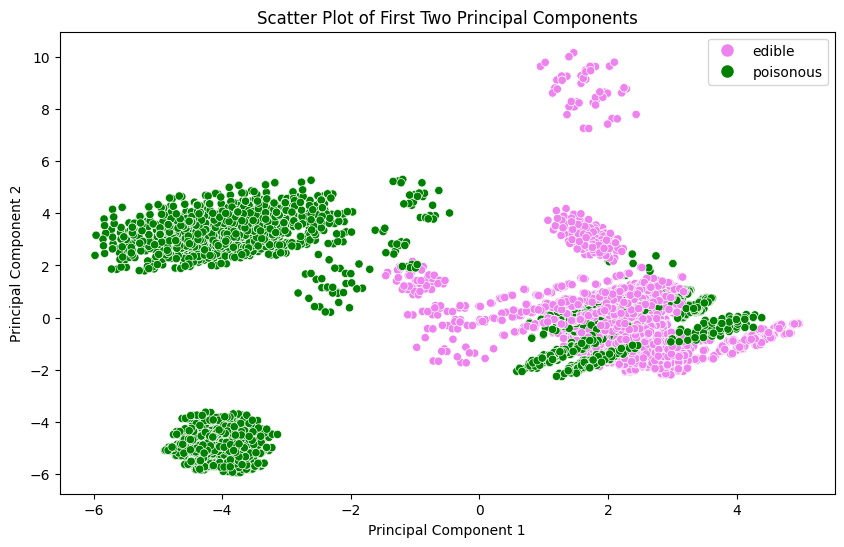

In [12]:
""" Plot the scatter plot of the first two principal components """
plt.figure(figsize=(10, 6))
colors = ['violet' if row[0] == 1 else 'green' for row in y_scaled]
sns.scatterplot(x='PC1', y='PC2', data=X_pca_2d, alpha=1, color=colors)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='violet', markersize=10, label='edible'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='poisonous')
])
plt.show()

We can see the clusters being formed (not exactly two), and data is not pretty separable

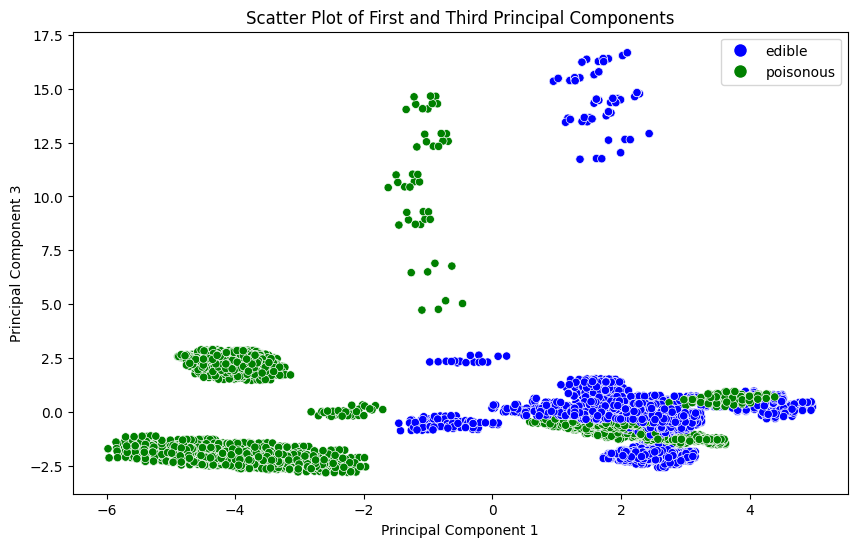

In [36]:
""" Plot between PC1 and PC3 """
plt.figure(figsize=(10, 6))
colors = ['blue' if row[0] == 1 else 'green' for row in y_scaled]
sns.scatterplot(x='PC1', y='PC3', data=X_pca_df[['PC1', 'PC3']], alpha=1, color=colors)
plt.title('Scatter Plot of First and Third Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.grid(False)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='edible'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='poisonous')
])
plt.show()

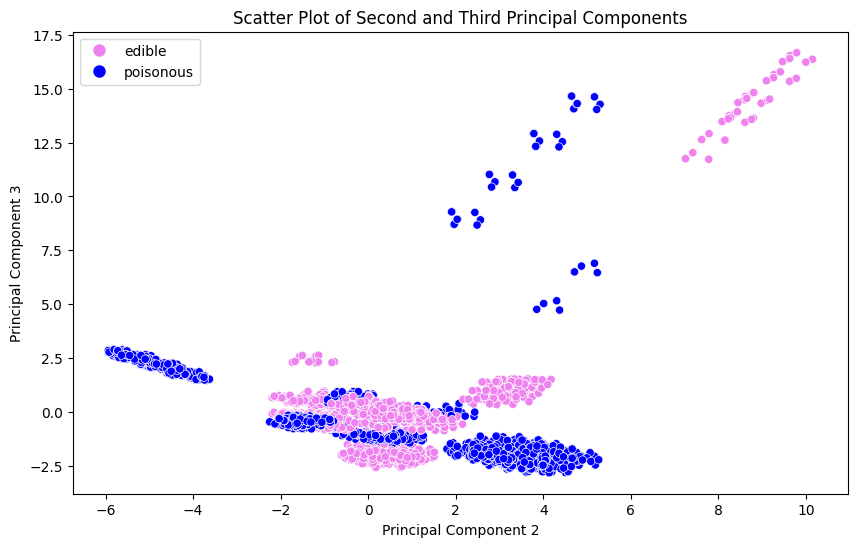

In [35]:
""" Scatter plot between PC2 and PC3 """
plt.figure(figsize=(10, 6))
colors = ['violet' if row[0] == 1 else 'blue' for row in y_scaled]
sns.scatterplot(x='PC2', y='PC3', data=X_pca_df[['PC2', 'PC3']], alpha=1, color=colors)
plt.title('Scatter Plot of Second and Third Principal Components')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.grid(False)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='violet', markersize=10, label='edible'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='poisonous')
])
plt.show()

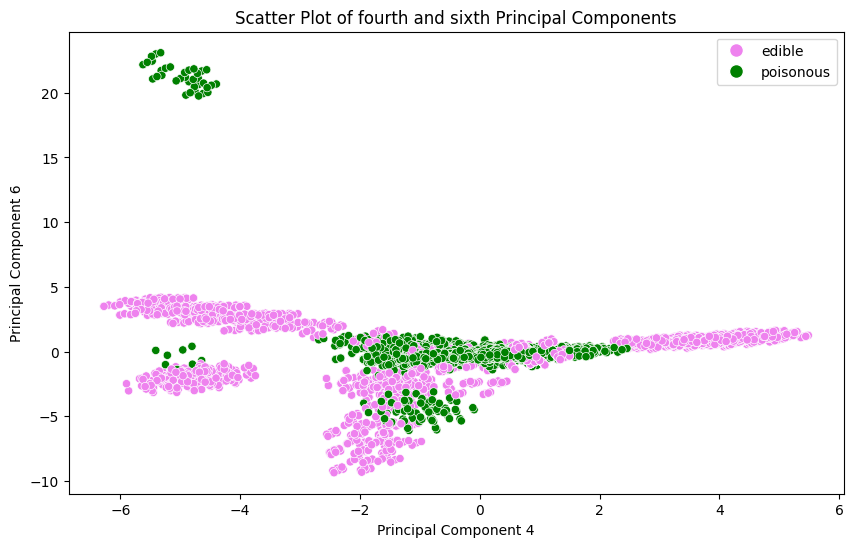

In [43]:

plt.figure(figsize=(10, 6))
colors = ['violet' if row[0] == 1 else 'green' for row in y_scaled]
sns.scatterplot(x='PC4', y='PC6', data=X_pca_df, alpha=1, color=colors)
plt.title('Scatter Plot of fourth and sixth Principal Components')
plt.xlabel('Principal Component 4')
plt.ylabel('Principal Component 6')
plt.grid(False)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='violet', markersize=10, label='edible'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='poisonous')
])
plt.show()

#### <b>Conclusion: </b>
In none of the scatter plots the points are separable!

### Part C: Performance Evaluation with Logistic Regression

1. Baseline model


In [47]:
""" converting y_train and y_test to 1D array """

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
y_train_reshpaed = y_train[:, 0]
y_test_reshpaed = y_test[:, 0]


In [48]:
""" Implement Logistic Regression on the original data """

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve, roc_curve, roc_auc_score,f1_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_reshpaed)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test_reshpaed, y_pred))
print("Classification Report:\n", classification_report(y_test_reshpaed, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_reshpaed, y_pred))
print("F1 Score:", f1_score(y_test_reshpaed, y_pred, average='weighted'))



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       782
         1.0       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[782   0]
 [  0 843]]
F1 Score: 1.0


The baseline model is having accuracy of 100%

2. PCA Transformed Model

In [ ]:
""" Apply the PCA with n_components=59 """

pca_opt = PCA(n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled_df)


In [ ]:
""" Implement Logistic Regression on the original and PCA-transformed data """
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_opt, y_scaled, test_size=0.3, random_state=42)
y_train_reshpaed = y_train[:, 0]
y_test_reshpaed = y_test[:, 0]

""" Implement Logistic Regression on the PCA-transformed data """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_reshpaed)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test_reshpaed, y_pred))
print("Classification Report:\n", classification_report(y_test_reshpaed, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_reshpaed, y_pred))
print("F1 Score:", f1_score(y_test_reshpaed, y_pred, average='weighted'))



Accuracy: 0.9995898277276456
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1181
         1.0       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix:
 [[1180    1]
 [   0 1257]]
F1 Score: 0.9995898224087307


The accuracy of PCA-Transformed Model is 99.95%

3. Comparision and Analysis

- Both the models are very accurate in classifying the mushroom dataset.
- Thought the pca-transformed model uses just 59 principle components it achieves the 99.9% accuracy, hence reducing the redundancy and decreasing the computational requirements.
- There is no significant difference in the performance of the two models, may be becuase the originial dataset might have redundant features, or there is no need of many features to classify the data but only 59 features can suffice.
- PCA's ability to handle feature collinearity and redundancy provide a performance benefit as the model needs only first 59 principle components reducing computation.
  

#### <b> Usefulness of using Logistic Regression as a surrogate performance measurement for evaluating the effectiveness of PCA. </b>

Logistic Regression is a useful surrogate for evaluating PCA because it is simple, interpretable, and sensitive to collinearity among features. PCA removes redundancy and creates orthogonal components, which helps stabilize Logistic Regression. Since Logistic Regression does not add extra model complexity, any performance change can be attributed directly to PCA. Thus, it provides a clear, efficient, and reliable way to assess whether PCA has preserved essential information while reducing dimensionality.